In [52]:
import scipy.stats as sista
import scipy.io as sio
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none' # change svg font type from path to text
import seaborn as sns
import pandas as pd

from statsmodels.stats.multitest import multipletests  # ADDED BY HJ
import pingouin as pg

In [53]:
matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['font.family'] = "sans-serif"
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [54]:
# colors
color_ss2s = np.divide([107,174,214],255)
color_ss2d = np.divide([8,81,156],255)
color_ss4s = np.divide([158,154,200],255)
color_ss4d = np.divide([84,39,143],255)

# mid blue
color_ss2 = np.divide([58,128,185],255)
# mid purple
color_ss4 = np.divide([121,97,172],255)

# black
color_s = np.divide([253,190,133],255)
color_d = np.divide([217,71,1],255)
color_gen = np.divide([253,141,60],255)

In [55]:
thisColor1 = color_ss4s
thisColor2 = color_ss2d
thisColor3 = color_ss2s

conds = 'ss2s_ss4s_ss2d_exp1'
theseLabels = ['2 Same','4 Same','2 Different']
data = sio.loadmat(conds+'.mat')
acc = data['acc']
acc_shuff = data['acc_shuff']
conf_mat = data['conf_mat']
confid_scores = data['confid_scores']

num_cs = np.size(conf_mat,3)
nsubj = np.size(acc,0)

#trial timing
t0 = -400
te = 1551
time_window = 50 #bin width
time_step = 25 #bin offset (if smaller than tw, will have overlap)
samples = np.arange(t0,te,2)
sample_step = samples[1]-samples[0]
t = samples[0:samples.shape[0]-int(time_window/sample_step)+1:int(time_step/sample_step)]

In [56]:
# ADDED BY HJ - Significance testing w/ FDR correction for multiple comparisons, rather than cluster based testing

dat1 = np.mean(confid_scores,2)[:,:,0]
dat2 = np.mean(confid_scores,2)[:,:,1]
dat3 = np.mean(confid_scores,2)[:,:,2]

pvals_1v3 = sista.ttest_rel(dat1,dat3,axis=0).pvalue
_, corrected_p1v3, _, _ = multipletests(pvals_1v3, method='fdr_bh')
sig_idx1v3 = corrected_p1v3 < .05

pvals_2v3 = sista.ttest_rel(dat2,dat3,axis=0).pvalue
_, corrected_p2v3, _, _ = multipletests(pvals_2v3, method='fdr_bh')
sig_idx2v3 = corrected_p2v3 < .05

In [57]:
pg.ttest(dat1[:, (t > 650) & (t < 1450)].mean(1),dat3[:, (t > 650) & (t < 1450)].mean(1), paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.248533,9,two-sided,0.8093,"[-0.51, 0.41]",0.079924,0.317,0.055924


In [58]:
pg.ttest(dat2[:, (t > 650) & (t < 1450)].mean(1),dat3[:, (t > 650) & (t < 1450)].mean(1), paired=True)

/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.501443,9,two-sided,0.000111,"[1.39, 2.88]",3.528193,260.631,1.0


[-3.4  2.8]
[-3.4, 3.4]
2.55
-3.1166666666666667


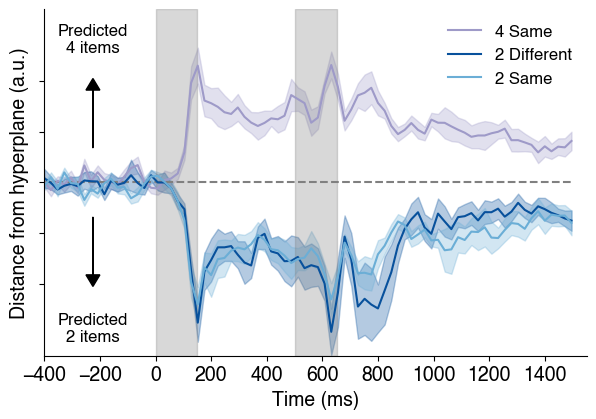

In [59]:
# plotting
matplotlib.rcParams['figure.figsize'] = [7, 4.5]

# dat1 = np.mean(confid_scores,2)[:,:,0]
# dat2 = np.mean(confid_scores,2)[:,:,1]
# dat3 = np.mean(confid_scores,2)[:,:,2]

# Plot confidence of classifier, which is proportional to distance from hyperplane.
stim_time1 = [0,151]
stim_time2 = [500,651]

ax = plt.subplot(111)

ax.plot(t,np.zeros((len(t))),'--',color='gray')

#plot second var data first, is typically higher than the first
mean = np.mean(dat2,0)
temp_lims = [np.min(mean),np.max(mean)]
med = mean
sem = sista.sem(dat2,0)
upper,lower = mean + sem, mean - sem
#med, upper, lower = get_plot_line(ss4d)
ax.plot(t,med,color=thisColor1,label = theseLabels[1])
ax.fill_between(t,upper,lower, color=thisColor1,alpha=.3)

#plot condition of interest
mean = np.mean(dat3,0)
temp_lims = [np.min([np.min(mean),temp_lims[0]]),np.max([np.max(mean),temp_lims[1]])]
med = mean
sem = sista.sem(dat3,0)
upper,lower = mean + sem, mean - sem
#med, upper, lower = get_plot_line(ss4s)
ax.plot(t,med,color=thisColor2,label = theseLabels[2])
ax.fill_between(t,upper,lower, color=thisColor2, alpha=.3)

#the 'lower' condition
mean = np.mean(dat1,0)
temp_lims = [np.min([np.min(mean),temp_lims[0]]),np.max([np.max(mean),temp_lims[1]])]
med = mean
sem = sista.sem(dat1,0)
upper,lower = mean + sem, mean - sem
#med, upper, lower = get_plot_line(ss2d)
ax.plot(t,med,color=thisColor3,label = theseLabels[0])
ax.fill_between(t,upper,lower, color=thisColor3, alpha=.3)

leg = plt.legend(loc='upper right',fontsize=12,frameon=False)
plt.setp(leg.get_title(),fontsize=12)

# setting stimulus pres boxes before significance boxes
ylim = np.round([temp_lims[0]-.5,temp_lims[1]+.5],1)
print(ylim)
ylim = [-np.max(np.abs(ylim)),np.max(np.abs(ylim))]
print(ylim)

stim_lower,stim_upper = ylim
ax.fill_between(stim_time1,[stim_lower,stim_lower],[stim_upper,stim_upper],color='gray',alpha=.3)
ax.fill_between(stim_time2,[stim_lower,stim_lower],[stim_upper,stim_upper],color='gray',alpha=.3)


# # significance boxes
# sig_timepoints1v3 = t[sig_idx1v3]
# plt.scatter(sig_timepoints1v3, np.ones(sum(sig_idx1v3))*(-2),
#                             marker='s', s=28, color=thisColor2, label='p < .05')
# print(f'Significant timepoints 2Sv2D: {sig_timepoints1v3}')

# sig_timepoints2v3 = t[sig_idx2v3]
# plt.scatter(sig_timepoints2v3, np.ones(sum(sig_idx2v3))*(3.3),
#                             marker='s', s=28, color=thisColor1, label='p < .05')
# print(f'Significant timepoints 4Sv2D: {sig_timepoints2v3}')


# aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yticks(np.arange(-2,3,1),labels=['','','','',''])
ax.set_xticks(np.arange(-400,1551,200))
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

plt.xlim(-400,1551)

plt.ylim(ylim)

# labelling
#plt.title('Distance from the hyperplane',fontsize=18)
plt.xlabel('Time (ms)', fontsize=14)
plt.ylabel('Distance from hyperplane (a.u.)', fontsize=14)

arrow_l = np.min(np.abs(ylim))/3
print(arrow_l+(arrow_l*1.25))
print(-arrow_l-(arrow_l*1.75))
plt.text(-225,arrow_l+(arrow_l*1.25),'Predicted\n4 items',fontsize=12,ha='center')
plt.text(-225,-arrow_l-(arrow_l*1.75),'Predicted\n2 items',fontsize=12,ha='center')
#plt.text(125,2.6,'Stim',fontsize=14,ha='center',c='white')

arrow_y = (ylim[1]-ylim[0])*.1

plt.arrow(-225,arrow_y,0,arrow_l, head_width=50, head_length=arrow_l*.2,color='k')
plt.arrow(-225,-arrow_y,0,-arrow_l,head_width=50, head_length=arrow_l*.2,color='k')

plt.savefig('figure_'+conds+'_hyperplane.svg',bbox_inches='tight',dpi = 1000,format='svg')

plt.show()

In [60]:
summary_df = pd.DataFrame({
    '2 Same': dat1[:, (t > 650) & (t < 1450)].mean(1),
    '4 Same': dat2[:, (t > 650) & (t < 1450)].mean(1),
    '2 Different': dat3[:, (t > 650) & (t < 1450)].mean(1),
    'subject': np.arange(1, 11)
})
summary_df = pd.melt(summary_df, id_vars=['subject'], value_vars=['2 Same', '4 Same', '2 Different'], var_name='condition', value_name='confidence')
summary_df

,subject,condition,confidence
0,1,2 Same,-1.250960
1,2,2 Same,-0.732869
2,3,2 Same,-1.672375
3,4,2 Same,-2.097788
4,5,2 Same,-0.620371
5,6,2 Same,-1.276515
6,7,2 Same,-0.722833
7,8,2 Same,-0.471011
8,9,2 Same,-1.235489
9,10,2 Same,-0.784885


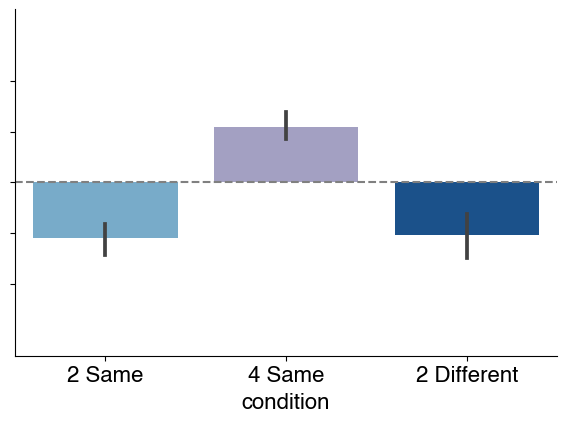

In [61]:
# add dashed line at 0
plt.axhline(y=0, color='gray', linestyle='--')
sns.barplot(x='condition', y='confidence', data=summary_df, palette=[thisColor3, thisColor1, thisColor2])
#remove top and right borders
sns.despine()
plt.ylim(ylim)
plt.yticks(np.arange(-2,3,1),labels=['','','','',''])
plt.ylabel('')
plt.savefig('figure_'+conds+'_hyperplane_barplot.svg',bbox_inches='tight',dpi = 1000,format='svg')


# Train different, test 4 same

In [62]:
thisColor1 = color_ss4d
thisColor2 = color_ss4s
thisColor3 = color_ss2d

conds = 'ss2d_ss4d_ss4s_exp1'
theseLabels = ['2 Different','4 Different','4 Same']
data = sio.loadmat(conds+'.mat')
acc = data['acc']
acc_shuff = data['acc_shuff']
conf_mat = data['conf_mat']
confid_scores = data['confid_scores']

num_cs = np.size(conf_mat,3)
nsubj = np.size(acc,0)

#trial timing
t0 = -400
te = 1551
time_window = 50 #bin width
time_step = 25 #bin offset (if smaller than tw, will have overlap)
samples = np.arange(t0,te,2)
sample_step = samples[1]-samples[0]
t = samples[0:samples.shape[0]-int(time_window/sample_step)+1:int(time_step/sample_step)]

In [63]:
# ADDED BY HJ - Significance testing w/ FDR correction for multiple comparisons, rather than cluster based testing

dat1 = np.mean(confid_scores,2)[:,:,0]
dat2 = np.mean(confid_scores,2)[:,:,1]
dat3 = np.mean(confid_scores,2)[:,:,2]

pvals_1v3 = sista.ttest_rel(dat1,dat3,axis=0).pvalue
_, corrected_p1v3, _, _ = multipletests(pvals_1v3, method='fdr_bh')
sig_idx1v3 = corrected_p1v3 < .05

pvals_2v3 = sista.ttest_rel(dat2,dat3,axis=0).pvalue
_, corrected_p2v3, _, _ = multipletests(pvals_2v3, method='fdr_bh')
sig_idx2v3 = corrected_p2v3 < .05

In [64]:
pg.ttest(dat1[:, (t > 650) & (t < 1450)].mean(1),dat3[:, (t > 650) & (t < 1450)].mean(1), paired=True)

/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/opt/homebrew/Caskroom/miniforge/base/envs/accel/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.567074,9,two-sided,0.000349,"[-2.94, -1.24]",2.847049,98.89,1.0


In [65]:
pg.ttest(dat2[:, (t > 650) & (t < 1450)].mean(1),dat3[:, (t > 650) & (t < 1450)].mean(1), paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.118875,9,two-sided,0.907986,"[-0.57, 0.63]",0.041554,0.311,0.051598


[-3.2  3.6]
[-3.6, 3.6]
2.7
-3.3


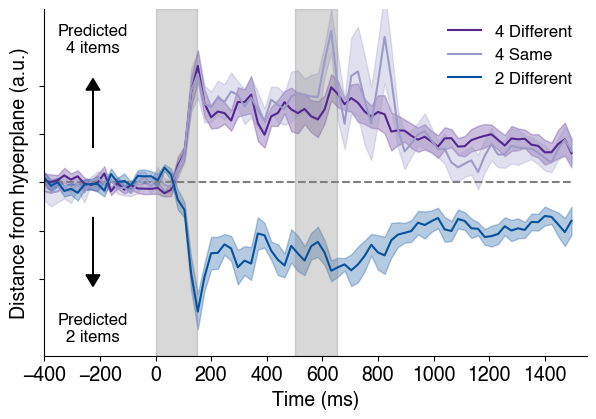

In [66]:
# plotting
matplotlib.rcParams['figure.figsize'] = [7, 4.5]

# dat1 = np.mean(confid_scores,2)[:,:,0]
# dat2 = np.mean(confid_scores,2)[:,:,1]
# dat3 = np.mean(confid_scores,2)[:,:,2]

# Plot confidence of classifier, which is proportional to distance from hyperplane.
stim_time1 = [0,151]
stim_time2 = [500,651]

ax = plt.subplot(111)

ax.plot(t,np.zeros((len(t))),'--',color='gray')

#plot second var data first, is typically higher than the first
mean = np.mean(dat2,0)
temp_lims = [np.min(mean),np.max(mean)]
med = mean
sem = sista.sem(dat2,0)
upper,lower = mean + sem, mean - sem
#med, upper, lower = get_plot_line(ss4d)
ax.plot(t,med,color=thisColor1,label = theseLabels[1])
ax.fill_between(t,upper,lower, color=thisColor1,alpha=.3)

#plot condition of interest
mean = np.mean(dat3,0)
temp_lims = [np.min([np.min(mean),temp_lims[0]]),np.max([np.max(mean),temp_lims[1]])]
med = mean
sem = sista.sem(dat3,0)
upper,lower = mean + sem, mean - sem
#med, upper, lower = get_plot_line(ss4s)
ax.plot(t,med,color=thisColor2,label = theseLabels[2])
ax.fill_between(t,upper,lower, color=thisColor2, alpha=.3)

#the 'lower' condition
mean = np.mean(dat1,0)
temp_lims = [np.min([np.min(mean),temp_lims[0]]),np.max([np.max(mean),temp_lims[1]])]
med = mean
sem = sista.sem(dat1,0)
upper,lower = mean + sem, mean - sem
#med, upper, lower = get_plot_line(ss2d)
ax.plot(t,med,color=thisColor3,label = theseLabels[0])
ax.fill_between(t,upper,lower, color=thisColor3, alpha=.3)

leg = plt.legend(loc='upper right',fontsize=12,frameon=False)
plt.setp(leg.get_title(),fontsize=12)

# setting stimulus pres boxes before significance boxes
ylim = np.round([temp_lims[0]-.5,temp_lims[1]+.5],1)
print(ylim)
ylim = [-np.max(np.abs(ylim)),np.max(np.abs(ylim))]
print(ylim)

stim_lower,stim_upper = ylim
ax.fill_between(stim_time1,[stim_lower,stim_lower],[stim_upper,stim_upper],color='gray',alpha=.3)
ax.fill_between(stim_time2,[stim_lower,stim_lower],[stim_upper,stim_upper],color='gray',alpha=.3)

# # significance boxes
# sig_timepoints1v3 = t[sig_idx1v3]
# plt.scatter(sig_timepoints1v3, np.ones(sum(sig_idx1v3))*(-3.3),
#                             marker='s', s=28, color=thisColor3, label='p < .05')
# print(f'Significant timepoints 2Sv2D: {sig_timepoints1v3}')

# sig_timepoints2v3 = t[sig_idx2v3]
# plt.scatter(sig_timepoints2v3, np.ones(sum(sig_idx2v3))*(3.3),
#                             marker='s', s=28, color=thisColor1, label='p < .05')
# print(f'Significant timepoints 4Sv2D: {sig_timepoints2v3}')


# aesthetics
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.yticks(np.arange(-2,3,1),labels=['','','','',''])
ax.set_xticks(np.arange(-400,1551,200))
plt.setp(ax.get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

plt.xlim(-400,1551)

plt.ylim(ylim)

# labelling
#plt.title('Distance from the hyperplane',fontsize=18)
plt.xlabel('Time (ms)', fontsize=14)
plt.ylabel('Distance from hyperplane (a.u.)', fontsize=14)

arrow_l = np.min(np.abs(ylim))/3
print(arrow_l+(arrow_l*1.25))
print(-arrow_l-(arrow_l*1.75))
plt.text(-225,arrow_l+(arrow_l*1.25),'Predicted\n4 items',fontsize=12,ha='center')
plt.text(-225,-arrow_l-(arrow_l*1.75),'Predicted\n2 items',fontsize=12,ha='center')
#plt.text(125,2.6,'Stim',fontsize=14,ha='center',c='white')

arrow_y = (ylim[1]-ylim[0])*.1

plt.arrow(-225,arrow_y,0,arrow_l, head_width=50, head_length=arrow_l*.2,color='k')
plt.arrow(-225,-arrow_y,0,-arrow_l,head_width=50, head_length=arrow_l*.2,color='k')

plt.savefig('figure_'+conds+'_hyperplane.svg',bbox_inches='tight',dpi = 1000,format='svg')

plt.show()

In [67]:
summary_df = pd.DataFrame({
    '2 Different': dat1[:, (t > 650) & (t < 1450)].mean(1),
    '4 Different': dat2[:, (t > 650) & (t < 1450)].mean(1),
    '4 Same': dat3[:, (t > 650) & (t < 1450)].mean(1),
    'subject': np.arange(1, 11)
})
summary_df = pd.melt(summary_df, id_vars=['subject'], value_vars=['2 Different', '4 Different', '4 Same'], var_name='condition', value_name='confidence')
summary_df

,subject,condition,confidence
0,1,2 Different,-1.370240
1,2,2 Different,-0.897675
2,3,2 Different,-1.721958
3,4,2 Different,-1.548530
4,5,2 Different,-0.807448
5,6,2 Different,-1.261175
6,7,2 Different,-0.702849
7,8,2 Different,-0.439426
8,9,2 Different,-0.809501
9,10,2 Different,-1.304675


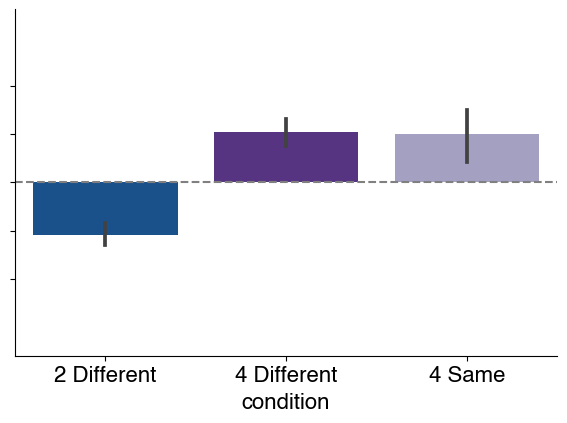

In [68]:
# add dashed line at 0
plt.axhline(y=0, color='gray', linestyle='--')
sns.barplot(x='condition', y='confidence', data=summary_df, palette=[thisColor3, thisColor1, thisColor2])
#remove top and right borders
sns.despine()
plt.ylim(ylim)
plt.yticks(np.arange(-2,3,1),labels=['','','','',''])
plt.ylabel('')
plt.savefig('figure_'+conds+'_hyperplane_barplot.svg',bbox_inches='tight',dpi = 1000,format='svg')

In [ ]:
scipy.stats